<a href="https://colab.research.google.com/github/shadab007-byte/Plant_disease_prediction_CNN/blob/main/Plant_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#for seeds reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)



In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , models
import tensorflow as tf

In [3]:
!pip install kaggle

In [4]:
kaggle_credentails = json.load(open('kaggle.json'))
os.environ['KAGGLE_USERNAME'] = kaggle_credentails['username']
os.environ['KAGGLE_KEY'] = kaggle_credentails['key']


In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.03G/2.04G [00:16<00:00, 238MB/s]
100% 2.04G/2.04G [00:16<00:00, 131MB/s]


In [6]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [7]:
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [8]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Grape___healthy', 'Blueberry___healthy', 'Tomato___Target_Spot']
38
['Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Grape___healthy', 'Blueberry___healthy', 'Tomato___Target_Spot']
38
['Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Grape___healthy', 'Blueberry___healthy', 'Tomato___Target_Spot']


Number of Classes are 38

In [9]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['603a6e76-4457-4ac2-a549-1560c7c1cf30___Mt.N.V_HL 9065.JPG', '8f838b46-d591-4247-bf64-982e45e1a699___Mt.N.V_HL 8952.JPG', 'd7523938-e65a-469b-bf29-656e05bfde99___Mt.N.V_HL 9046.JPG', 'd232a29e-e702-4b4e-b568-f022ffd375c4___Mt.N.V_HL 6158.JPG', 'f5310751-1f5c-426e-9e50-52bb5b7a2145___Mt.N.V_HL 8950.JPG']


Data preprocessing

In [10]:
base_dir = "plantvillage dataset/color"

(256, 256, 3)


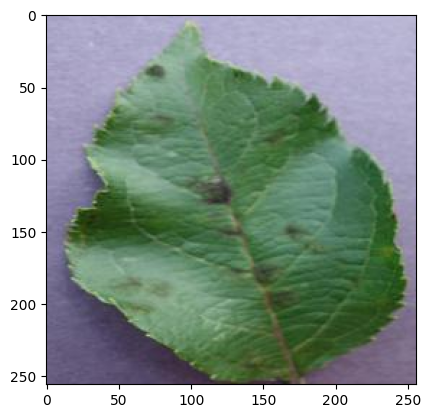

In [11]:
image_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'

# Read image
img = mpimg.imread(image_path)
print(img.shape)
# Plot image
plt.imshow(img)
plt.show()

In [12]:
# image parameter

img_size = 224     #because it is widely use size and all image become of same size
batch_size = 64

In [13]:
# image data generator

data_gen = ImageDataGenerator(rescale =1/255 , validation_split = 0.2)

In [14]:
# Train Generator
train_generator = data_gen.flow_from_directory(base_dir,
                                               target_size=(img_size,img_size),
                                               batch_size = batch_size ,
                                               subset = 'training',
                                               class_mode = 'categorical'
                                               )

Found 43456 images belonging to 38 classes.


In [15]:
#Validation Generator
validation_generator = data_gen.flow_from_directory(base_dir,
                                               target_size=(img_size,img_size),
                                               batch_size = batch_size ,
                                               subset = 'validation',
                                               class_mode = 'categorical'
                                               )

Found 10849 images belonging to 38 classes.


In [16]:
# Model defination

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3) , activation = 'relu' , input_shape = (img_size,img_size,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3) , activation = 'relu' ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3) , activation = 'relu' ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,415,590 (169.43 MB)

 Trainable params: 44,415,590 (169.43 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'] )

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 5,
    validation_data = train_generator,
    validation_steps = train_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
679/679 ━━━━━━━━━━━━━━━━━━━━ 211s 296ms/step - accuracy: 0.5466 - loss: 1.7980 - val_accuracy: 0.8950 - val_loss: 0.3315
Epoch 2/5
679/679 ━━━━━━━━━━━━━━━━━━━━ 197s 291ms/step - accuracy: 0.9019 - loss: 0.3071 - val_accuracy: 0.9524 - val_loss: 0.1490
Epoch 3/5
679/679 ━━━━━━━━━━━━━━━━━━━━ 197s 290ms/step - accuracy: 0.9506 - loss: 0.1516 - val_accuracy: 0.9740 - val_loss: 0.0836
Epoch 4/5
679/679 ━━━━━━━━━━━━━━━━━━━━ 196s 288ms/step - accuracy: 0.9717 - loss: 0.0884 - val_accuracy: 0.9554 - val_loss: 0.1460
Epoch 5/5
679/679 ━━━━━━━━━━━━━━━━━━━━ 204s 292ms/step - accuracy: 0.9785 - loss: 0.0659 - val_accuracy: 0.9876 - val_loss: 0.0358


In [20]:
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)

169/169 ━━━━━━━━━━━━━━━━━━━━ 24s 144ms/step - accuracy: 0.9236 - loss: 0.2996


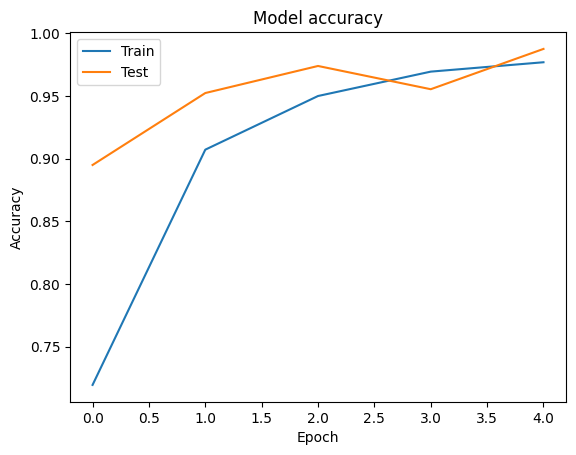

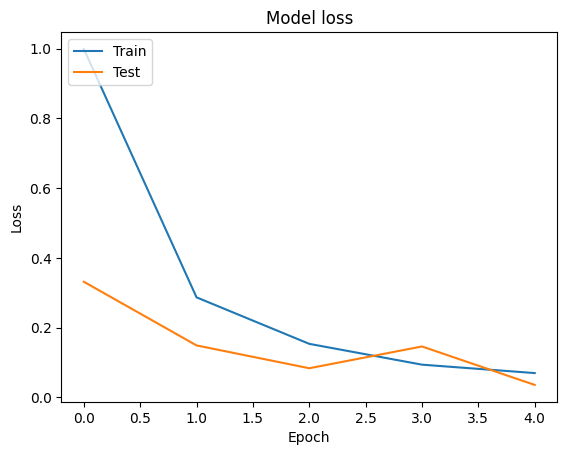

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [23]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}


In [24]:

class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [29]:

# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [34]:
#image_path = '/content/potato.jpg'
#image_path = '/content/late-blight-potato-plant.jpg'
image_path = '/content/Tomato-late-blight-72605cba08f2483aae0fd8f1dc3532a9.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Class Name: Tomato___Late_blight


In [27]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
model.save('/content/drive/MyDrive/plant_disease_prediction_model.keras')


In [37]:
!cp /content/drive/MyDrive/plant_disease_prediction_model.keras .


In [42]:
# Step 1: Install required libraries
!pip install flask pyngrok

# Step 2: Add your ngrok authtoken (only needs to be done once per Colab session)
!ngrok config add-authtoken your ngrok authtoken


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [43]:
app_code = """
from flask import Flask, request, render_template_string
from PIL import Image
import numpy as np
import os
from tensorflow.keras.models import load_model
from pyngrok import ngrok

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

app = Flask(__name__)
UPLOAD_FOLDER = "uploads"
os.makedirs(UPLOAD_FOLDER, exist_ok=True)

model = load_model("plant_disease_prediction_model.keras")

class_names = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
    'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight',
    'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy',
    'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy',
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight',
    'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'
]
class_indices = {i: name for i, name in enumerate(class_names)}

HTML_TEMPLATE = '''
<!doctype html>
<html>
  <head>
    <title>🌿 Plant Disease Classifier</title>
    <style>
      body { font-family: Arial; text-align: center; background: #f4f4f4; padding-top: 50px; }
      h1 { color: #2c3e50; }
      form { background: white; display: inline-block; padding: 20px; border-radius: 8px; box-shadow: 0 0 10px #ccc; }
      input[type="file"] { margin: 10px 0; }
      input[type="submit"] { padding: 10px 20px; background: #27ae60; color: white; border: none; border-radius: 5px; cursor: pointer; }
      input[type="submit"]:hover { background: #2ecc71; }
      .result { margin-top: 20px; font-size: 1.2em; color: #2980b9; }
    </style>
  </head>
  <body>
    <h1>🌿 Plant Disease Classifier (38 Classes)</h1>
    <form method="post" enctype="multipart/form-data">
      <input type="file" name="file" required><br>
      <input type="submit" value="Predict">
    </form>
    {% if prediction %}
      <div class="result">🔍 Predicted Class: <strong>{{ prediction }}</strong></div>
    {% endif %}
  </body>
</html>
'''

@app.route("/", methods=["GET", "POST"])
def predict():
    prediction = None
    if request.method == "POST":
        file = request.files["file"]
        file_path = os.path.join(UPLOAD_FOLDER, file.filename)
        file.save(file_path)
        prediction = predict_image_class(model, file_path, class_indices)
    return render_template_string(HTML_TEMPLATE, prediction=prediction)

if __name__ == "__main__":
    public_url = ngrok.connect(5000)
    print(" * ngrok tunnel:", public_url)
    app.run(port=5000)
"""


In [44]:

# Step 4: Write it to file and run
with open("app.py", "w") as f:
    f.write(app_code)

# Step 5: Start the Flask app
!python app.py

2025-06-14 08:37:16.039306: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749890236.164199   12800 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749890236.200522   12800 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-14 08:37:22.464058: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1749890242.464227   12800 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9726 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
2